# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
from citipy import citipy
from scipy.stats import linregress

# import API key
from api_keys import weather_api_key

## Generate Cities List

In [2]:
#create lists for variables
lat = []
long = []
city_names = []
country_codes = []

#randomly generatate latitudes and longitudes & create dataframe

for lats in np.random.uniform(-90,90,1500):
    lat.append(lats)


for lons in np.random.uniform(-180,180,1500):
    long.append(lons)
    
cities_df = pd.DataFrame({"Lat":lat, "Long":long})

#iterate through each row and find the city name and city code for each country

for index, row in cities_df.iterrows():
        lat = row["Lat"]
        long = row["Long"]
        city = citipy.nearest_city(lat,long)
        cityname = city.city_name
        city_names.append(cityname)
        country = city.country_code
        country_codes.append(country)

cities_df["City"] = city_names
cities_df["Country"] = country_codes
        
cities_df = cities_df.drop_duplicates(subset = ["City"], keep = "first")
citycount = len(cities_df["City"])
print(f"There are {citycount} cities")

There are 611 cities


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create columns in dataframe for API informations required 
cities_df["Date"] = ""
cities_df["Max Temperature"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""

#define counter =1 at start of the loop and API key
city_no = 1
API_key = weather_api_key

# Loop through the cities_df and get weather data for each city - printing statement as the data is run for each city
base_url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + API_key

print("Process Started------------------------------------------------------------------")
# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():
    try:
        city_name = row["City"]
        country_code = row["Country"]
        # update address key value
        query_url = base_url +"&q=" + city_name+","+ country_code+"?"
        # Run request and convert to json
        response = requests.get(query_url).json()

        # Convert to JSON
        cities_df.loc[index, "Date"] = response["dt"]
        cities_df.loc[index, "Max Temperature"] = response["main"]["temp_max"]
        cities_df.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        
        print(f"Processing record {city_no} of {citycount}: {city_name}")
        city_no += 1
    except:
        print(f"{city_name} not found. Skipping..")
print("Process Completed------------------------------------------------------------------")



Process Started------------------------------------------------------------------
Processing record 1 of 611: luderitz
Processing record 2 of 611: goderich
Processing record 3 of 611: pevek
Processing record 4 of 611: mao
Processing record 5 of 611: airai
Processing record 6 of 611: ostrovnoy
Processing record 7 of 611: yellowknife
Processing record 8 of 611: praya
Processing record 9 of 611: srednekolymsk
Processing record 10 of 611: hasaki
Processing record 11 of 611: castro
Processing record 12 of 611: te anau
Processing record 13 of 611: roma
Processing record 14 of 611: bardiyah
Processing record 15 of 611: richards bay
Processing record 16 of 611: mataura
Processing record 17 of 611: qaanaaq
Processing record 18 of 611: provideniya
Processing record 19 of 611: oranjestad
Processing record 20 of 611: punta arenas
Processing record 21 of 611: port elizabeth
Processing record 22 of 611: hobart
Processing record 23 of 611: kamenka
Processing record 24 of 611: loding
Processing record

Processing record 197 of 611: mersing
Processing record 198 of 611: agadez
Processing record 199 of 611: shelbyville
Processing record 200 of 611: tuktoyaktuk
rawannawi not found. Skipping..
Processing record 201 of 611: poum
Processing record 202 of 611: bafia
Processing record 203 of 611: bambous virieux
Processing record 204 of 611: kidal
Processing record 205 of 611: geraldton
Processing record 206 of 611: fairbanks
Processing record 207 of 611: beyla
Processing record 208 of 611: homberg
Processing record 209 of 611: olafsvik
Processing record 210 of 611: cidreira
Processing record 211 of 611: marzuq
Processing record 212 of 611: zhenhai
Processing record 213 of 611: camacha
Processing record 214 of 611: touros
Processing record 215 of 611: jaisalmer
Processing record 216 of 611: anadyr
Processing record 217 of 611: castelnaudary
Processing record 218 of 611: saint-augustin
Processing record 219 of 611: fredericksburg
Processing record 220 of 611: ferreira do alentejo
Processing r

Processing record 392 of 611: sola
Processing record 393 of 611: kharp
Processing record 394 of 611: peachland
Processing record 395 of 611: portland
Processing record 396 of 611: sorong
Processing record 397 of 611: mount isa
karaul not found. Skipping..
Processing record 398 of 611: massakory
Processing record 399 of 611: sault sainte marie
Processing record 400 of 611: kavaratti
Processing record 401 of 611: shakawe
warqla not found. Skipping..
Processing record 402 of 611: blagoyevo
Processing record 403 of 611: broken hill
Processing record 404 of 611: asfi
Processing record 405 of 611: salumbar
Processing record 406 of 611: sabang
Processing record 407 of 611: fredericton
sataua not found. Skipping..
Processing record 408 of 611: mangrol
Processing record 409 of 611: belyy yar
nizhneyansk not found. Skipping..
Processing record 410 of 611: beysehir
Processing record 411 of 611: matagami
Processing record 412 of 611: erdenet
Processing record 413 of 611: buta
Processing record 414

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#dataframe cleaning - to get numeric values and drop nan values.
cities_df[["Date", "Max Temperature","Humidity","Cloudiness","Wind Speed"]] = cities_df[["Date", "Max Temperature","Humidity","Cloudiness","Wind Speed"]].apply(pd.to_numeric, errors="coerce")
cities_df = cities_df.dropna()
cleancount = cities_df.count()
cleancount

Lat                560
Long               560
City               560
Country            560
Date               560
Max Temperature    560
Humidity           560
Cloudiness         560
Wind Speed         560
dtype: int64

In [5]:
cities_df.to_csv("../output_data/Cities_pd.csv")
cities_df.head()

,Lat,Long,City,Country,Date,Max Temperature,Humidity,Cloudiness,Wind Speed
0,-34.261312,-0.584121,luderitz,na,1.601704e+09,13.54,74.0,0.0,2.14
1,4.030846,-19.262935,goderich,sl,1.601704e+09,8.33,69.0,95.0,0.45
3,77.515467,173.190307,pevek,ru,1.601704e+09,0.49,87.0,96.0,1.32
4,14.609636,15.299001,mao,td,1.601704e+09,16.00,55.0,20.0,3.60
5,4.124654,138.969428,airai,pw,1.601704e+09,25.83,43.0,55.0,2.44


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

Step Skipped : No cities have humidity > 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

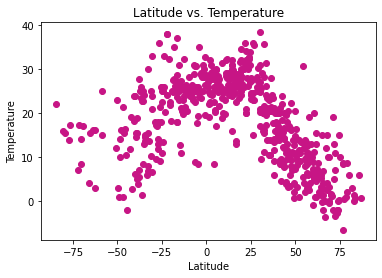

<Figure size 432x288 with 0 Axes>

In [6]:
#plot the graph, using label
Latitude_values = cities_df["Lat"]
Temperature_values = cities_df["Max Temperature"]
plt.scatter(Latitude_values,Temperature_values, color = "mediumvioletred", marker = "o")
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()
#save graph as png
plt.savefig("../output_data/Latitude vs. Temperature.png")

Analysis: The code is analysing the relationship between temperature and latitude - to see if temperatures are higher closer to equator. The code is basic scatter plot graph.

## Latitude vs. Humidity Plot

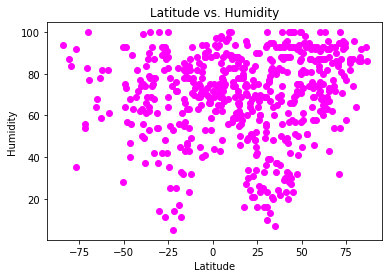

<Figure size 432x288 with 0 Axes>

In [7]:
#plot the graph, using label
Humidity_values = cities_df["Humidity"]
plt.scatter(Latitude_values,Humidity_values, color = "magenta", marker = "o")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
#save graph as png
plt.savefig("../output_data/Latitude vs. Humidity.png")

Analysis: The code is analysing the relationship between latitude and humidity - to humidity is higher closer to equator or certain latitudes. The code is basic scatter plot graph.

## Latitude vs. Cloudiness Plot

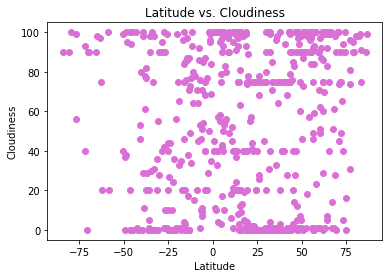

<Figure size 432x288 with 0 Axes>

In [20]:
#plot the graph, using label
Cloudiness_values = cities_df["Cloudiness"]
plt.scatter(Latitude_values,Cloudiness_values, color = "orchid", marker = "o")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
#save graph as png
plt.savefig("../output_data/Latitude vs. Cloudiness.png")

Analysis: The code is analysing the relationship between latitude and cloudiness - to see if cloudiness depends on latitude. The code is basic scatter plot graph.

## Latitude vs. Wind Speed Plot

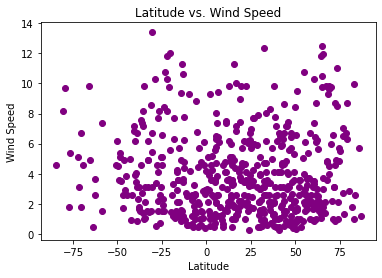

<Figure size 432x288 with 0 Axes>

In [9]:
#plot the graph, using label
Wind_values = cities_df["Wind Speed"]
plt.scatter(Latitude_values,Wind_values, color = "purple", marker = "o")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
#save graph as png
plt.savefig("../output_data/Latitude vs. Wind Speed.png")

Analysis: The code is analysing the relationship between latitude and wind speed - to see if wind speed depends on latitude. The code is basic scatter plot graph.

## Linear Regression

In [10]:
#define the hemispheres in seperate data frames

nh_df = cities_df[cities_df["Lat"]>=0]
sh_df = cities_df[cities_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

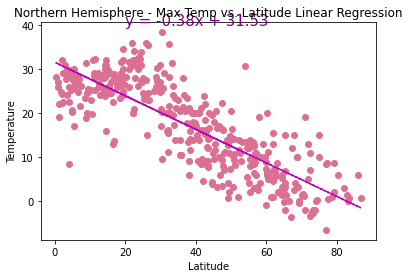

In [11]:
x_values = nh_df["Lat"]
y_values = nh_df["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "palevioletred")
plt.plot(x_values,regress_values,"m--")
plt.annotate(line_eq,(20,40),fontsize=15,color="purple")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("../output_data/NH:Latitude vs. Temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

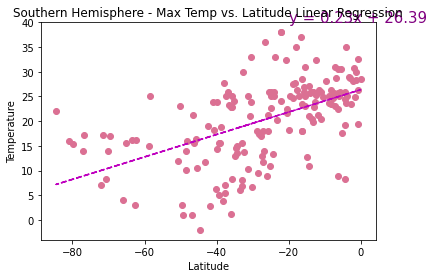

In [12]:
x_values = sh_df["Lat"]
y_values = sh_df["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "palevioletred")
plt.plot(x_values,regress_values,"m--")
plt.annotate(line_eq,(-20,40),fontsize=15,color="purple")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("../output_data/SH:Latitude vs. Temp.png")

Analysis: The temperature does seem to be correlated to latitudes, with latitudes closer to the equator having higher temperatures.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

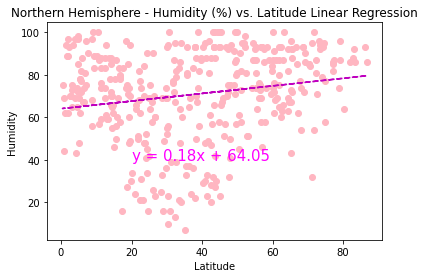

In [13]:
x_values = nh_df["Lat"]
y_values = nh_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "lightpink")
plt.plot(x_values,regress_values,"m--")
plt.annotate(line_eq,(20,40),fontsize=15,color="magenta")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../output_data/NH:Latitude vs. Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

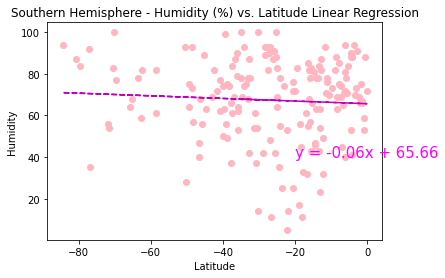

In [14]:
x_values = sh_df["Lat"]
y_values = sh_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "lightpink")
plt.plot(x_values,regress_values,"m--")
plt.annotate(line_eq,(-20,40),fontsize=15,color="magenta")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../output_data/SH:Latitude vs. Humidity.png")

Analysis: The humidity does not show a strong correlation to latitudes - with a flat regression line due to the range of humidity levels for each latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

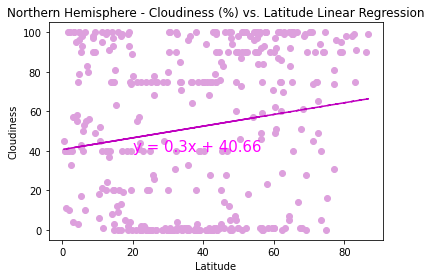

In [15]:
x_values = nh_df["Lat"]
y_values = nh_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "plum")
plt.plot(x_values,regress_values,"m--")
plt.annotate(line_eq,(20,40),fontsize=15,color="magenta")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data/NH:Latitude vs. Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

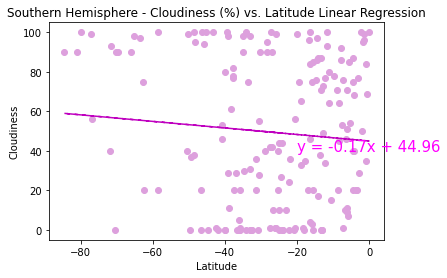

In [16]:
x_values = sh_df["Lat"]
y_values = sh_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "plum")
plt.plot(x_values,regress_values,"m--")
plt.annotate(line_eq,(-20,40),fontsize=15,color="magenta")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data/SH:Latitude vs. Cloudiness.png")

Analysis: The cloudiness humidity does not show a strong correlation to latitudes - with a flat regression line due to the range of cloudiness levels for each latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

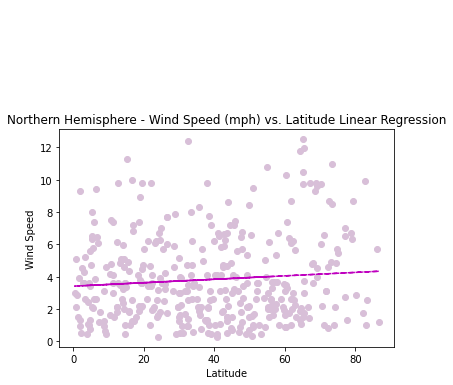

In [17]:
x_values = nh_df["Lat"]
y_values = nh_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "thistle")
plt.plot(x_values,regress_values,"m--")
plt.annotate(line_eq,(20,20),fontsize=15,color="magenta")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../output_data/NH:Latitude vs. WindSpeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

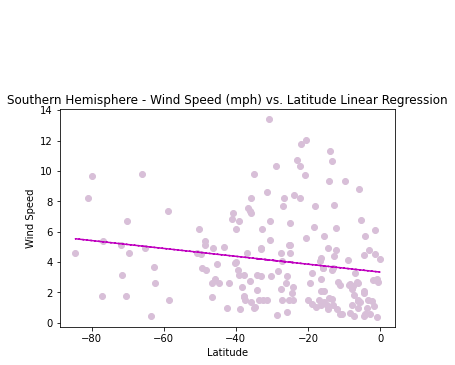

In [18]:
x_values = sh_df["Lat"]
y_values = sh_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "thistle")
plt.plot(x_values,regress_values,"m--")
plt.annotate(line_eq,(-20,20),fontsize=15,color="magenta")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../output_data/SH:Latitude vs. WindSpeed.png")

Analysis: The windspeed level shows slight correlation to latitudes - wind speed being higher further away from the equator.

Observable Trends:
    1) Latitude does correlate to temperature strongly
    2) However, it does not tie as strongly to cloudiness and humidity
    3) While windiness is not as strong of a correlation